In [168]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from fcmeans import FCM
from matplotlib.patches import Patch
from sklearn.metrics import silhouette_score

In [3]:
data1 = pd.read_csv('first_clustering_dataset.csv')
data2 = pd.read_csv('second_clustering_dataset.csv')
data3 = pd.read_csv('third_clustering_dataset.csv')

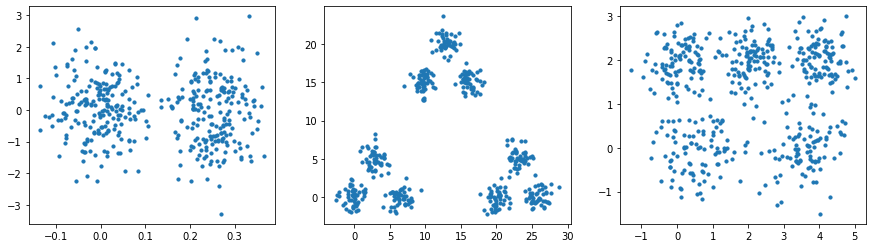

In [12]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.scatter(data1.values[:, 0], data1.values[:, 1], s=10)
plt.subplot(1, 3, 2)
plt.scatter(data2.values[:, 0], data2.values[:, 1], s=10)
plt.subplot(1, 3, 3)
plt.scatter(data3.values[:, 0], data3.values[:, 1], s=10)

### Optimal k for each data based on the 2d scatters
First data: 2
Second data: 9
Third data: 5

## Clustering Data 1

In [165]:
def cluster(data, data_label, n):
    init_centers = data.sample(n).values # 2 random points
    print("Initial centers are:", init_centers)
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data)
    print("Overall SSE is:", kmeans.inertia_)
    print("Final centroids are:", kmeans.cluster_centers_)
    plt.figure(figsize=(8, 5))
    plt.scatter(data.values[:, 0], data.values[:, 1], s=10, c=kmeans.labels_)
    plt.scatter(init_centers[:, 0], init_centers[:, 1], color='orange', label="Init centers")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', label="Final centers")
    plt.legend()
    plt.title("Clustering results for data {0} - manually selected K={1}".format(data_label, n))
    plt.tight_layout()
    plt.show()

Initial centers are: [[ 0.02131797  0.73080203]
 [-0.05833523 -0.31137113]]
Overall SSE is: 146.67025047692437
Final centroids are: [[ 0.11927991  0.71182715]
 [ 0.13154716 -0.87704013]]


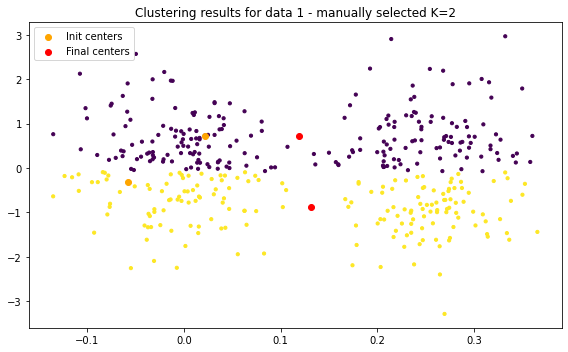

In [166]:
cluster(data1, "1", 2)

Initial centers are: [[12.98390911 20.73635405]
 [-0.25151036  0.05820066]
 [-0.33861545  0.79701727]
 [15.80371892 15.31673205]
 [12.58031441 20.12743434]
 [19.76100259 -0.18867146]
 [22.66274536  4.280093  ]
 [ 2.88017112  7.532215  ]
 [ 0.21704131 -1.20471505]]
Overall SSE is: 857.6146138169851
Final centroids are: [[ 2.30680979e+01  5.15503550e+00]
 [ 2.84988997e+00  4.94242493e+00]
 [ 1.29096417e+01  2.02142396e+01]
 [ 2.00273871e+01 -2.22845623e-01]
 [ 6.47161078e+00 -1.27806263e-01]
 [ 1.61350789e+01  1.51436948e+01]
 [-2.57010416e-01  2.26586581e-02]
 [ 2.58191399e+01  4.67357935e-02]
 [ 9.65835456e+00  1.50882682e+01]]


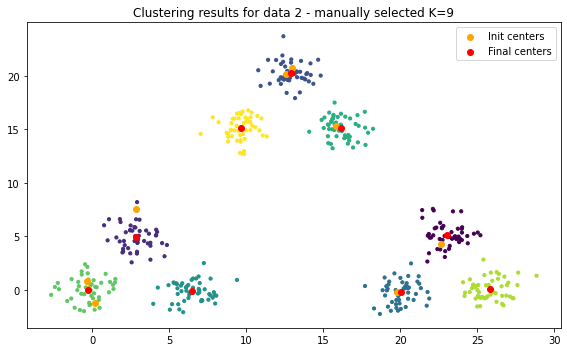

In [7]:
cluster(data2, "2", 9)

Initial centers are: [[ 3.35753752  0.07108173]
 [ 2.26414661  2.2889282 ]
 [-0.5831998   1.74202778]
 [ 2.54171316  1.6615252 ]
 [-0.17316945  2.24406698]]
Overall SSE is: 222.2010318209308
Final centroids are: [[ 4.02196517  2.0381927 ]
 [ 0.07190087  1.95680378]
 [ 0.56245254 -0.09518131]
 [ 3.5799822  -0.06140016]
 [ 2.07110263  1.99524376]]


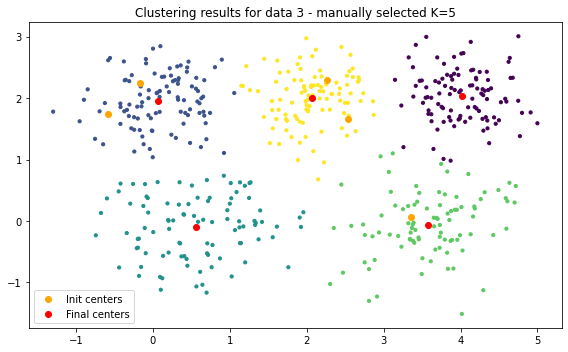

In [8]:
cluster(data3, "3", 5)

In [22]:
def K_Vs_SSE(data, data_label, k_range=range(2, 16)):
    SSE = []
    for K in k_range:
        kmeans = KMeans(n_clusters=K, init='random', n_init=200)
        kmeans.fit(data)
        SSE.append(kmeans.inertia_)
    plt.figure(figsize=(6, 4))
    plt.plot(list(k_range), SSE)
    plt.title("K vs. SSE for data {0}".format(data_label))
    plt.xticks(list(k_range))
    plt.tight_layout()
    plt.show()

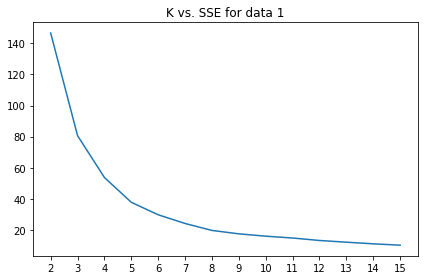

In [23]:
K_Vs_SSE(data1, "1")

The elbow point is K=5

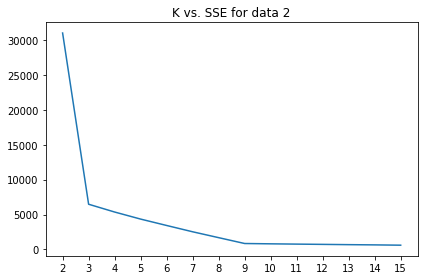

In [24]:
K_Vs_SSE(data2, "2")

The elbow point is K=3

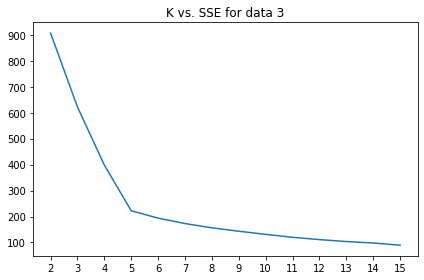

In [25]:
K_Vs_SSE(data3, "3")

The elbow point is K=5

In [117]:
def fuzzy(data, data_label, c):
    fcm = FCM(n_clusters=c)
    fcm.fit(data.values)
    """ uij = fcm.u.copy()
    uij[uij < 0.005] = 0"""
    labels = fcm.predict(data.values)
    # labels[[not (c-list(uij[i]).count(0))>1 for i in range(uij.shape[0])]] = -1
    plt.figure(figsize=(8, 5))
    plt.scatter(data.values[:, 0], data.values[:, 1], c=labels, s=10)
    """plt.scatter(data[labels==-1].values[:, 0], data[labels==-1].values[:, 1], color='red', s=15)
    plt.legend([Patch(color='red')], ['Belongs to more than 2 clusters'])"""
    plt.title("Fuzzy cmeans for data {0}, C={1}".format(data_label, c))
    plt.tight_layout()
    plt.show()

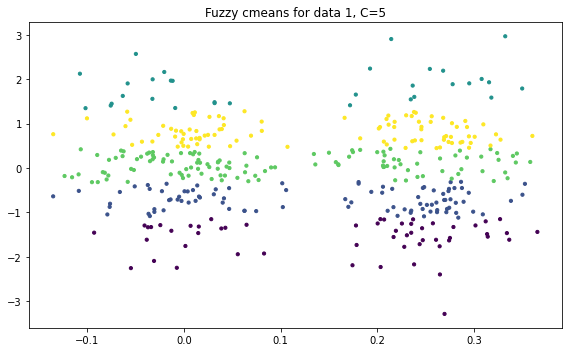

In [118]:
fuzzy(data1, "1", 5)

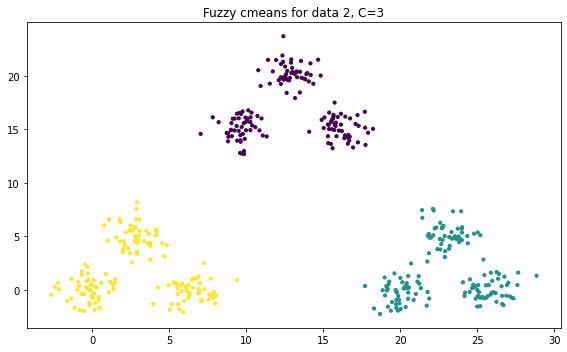

In [119]:
fuzzy(data2, "2", 3)

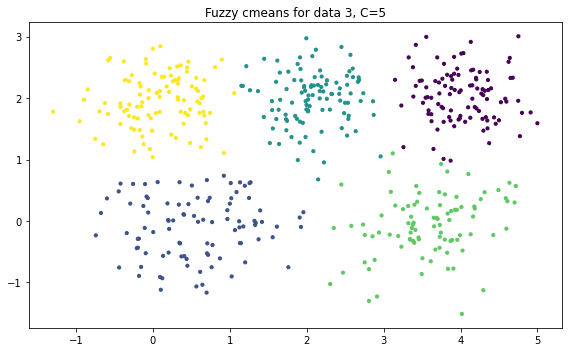

In [120]:
fuzzy(data3, "3", 5)

In [154]:
def dbscan(data, data_label, eps):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(data)
    plt.figure(figsize=(8, 5))
    non_outliers = data.values[dbscan.labels_!=-1]
    outliers = data.values[dbscan.labels_==-1]
    plt.scatter(non_outliers[:, 0], non_outliers[:, 1], s=10, c=dbscan.labels_[dbscan.labels_!=-1])
    plt.scatter(outliers[:, 0], outliers[:, 1], s=10, color='red', label='Outlier')
    plt.title("DBSCAN results for data {0}, {1} clusters are formed".format(data_label, dbscan.labels_.max()+1))
    plt.tight_layout()
    plt.legend()
    plt.show()

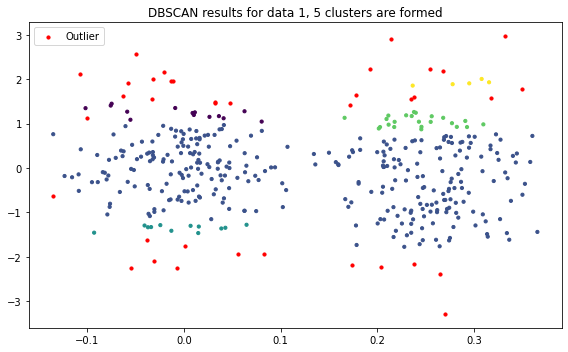

In [155]:
dbscan(data1, "1", 0.11)

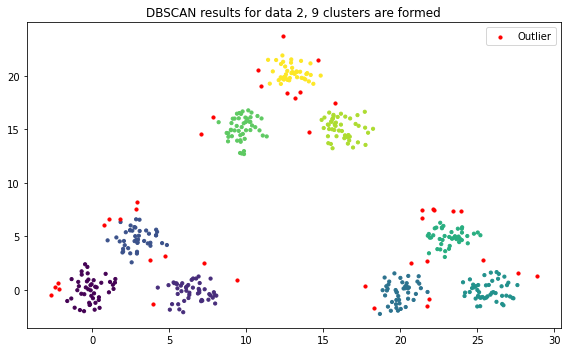

In [156]:
dbscan(data2, "2", 0.9)

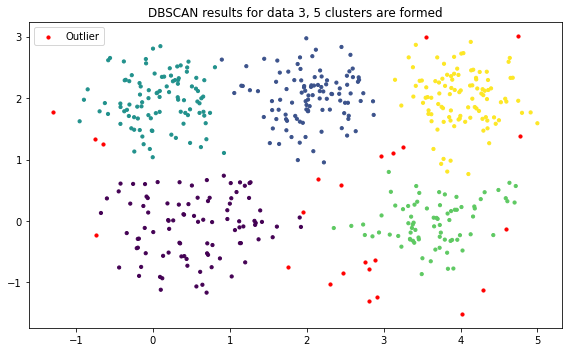

In [162]:
dbscan(data3, "3", 0.35)

In [178]:
def compare_all(data, data_label, n, c, eps):
    kmeans_scores = []
    cmeans_scores = []
    dbscan_scores = []
    for i in range(200):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(data)
        cmeans = FCM(n_clusters=c)
        cmeans.fit(data.values)
        dbscan = DBSCAN(eps=eps)
        dbscan.fit(data)
        kmeans_scores.append(silhouette_score(data, kmeans.labels_))
        cmeans_scores.append(silhouette_score(data, cmeans.predict(data.values)))
        dbscan_scores.append(silhouette_score(data[dbscan.labels_!=-1], dbscan.labels_[dbscan.labels_!=-1]))
    return pd.DataFrame(columns=['KMeans', 'FCMeans', 'DBSCAN'], data=[[
        max(kmeans_scores),
        max(cmeans_scores),
        max(dbscan_scores)
    ]])

#### I will be using th

In [179]:
compare_all(data1, "1", 5, 5, 0.11)

,KMeans,FCMeans,DBSCAN
0,0.456038,0.452915,0.00878


For data 1, KMeans outperforms the other 2 algorithms<br />
DBSCAN has the worst performance betweet the 3

In [181]:
compare_all(data2, "2", 3, 3, 0.9)

,KMeans,FCMeans,DBSCAN
0,0.723747,0.723747,0.724072


For data 2, DBSCAN is slightly better than the other 2 <br />
KMeans and Fuzzy-c-means have the same score

In [182]:
compare_all(data3, "3", 5, 5, 0.35)

,KMeans,FCMeans,DBSCAN
0,0.560695,0.560385,0.576508


For data 3, DBSCAN is slightly better than the other 2